# Intro data science - portfolio assignment 16: Train a decision tree on your own dataset

30 min: Train a decision tree to predict one of the categorical columns of your own dataset.

- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accuracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [2]:
import pandas as pd

students = pd.read_csv('datasets/StudentsPerformance.csv')

students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Splitting the dataset

We will split the dataset 70/30 so we have a train dataset and a test dataset.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
students_train, students_test = train_test_split(students, test_size=0.3, 
                                                 stratify=students['test preparation course'],
                                                random_state=42)

print(students_train.shape, students_test.shape)

(700, 8) (300, 8)


## Fitting the DecisionTreeClassifier

I want to predict the completion of the test preparation course based on the student's math score.

In [20]:
from sklearn.tree import DecisionTreeClassifier

features = ['math score']
dt_classification = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt_classification.fit(students_train[features], students_train['test preparation course'])

DecisionTreeClassifier(max_depth=3)

In [7]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [21]:
predictionsOnTrainSet = dt_classification.predict(students_train[features])
predictionsOnTestSet = dt_classification.predict(students_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainSet, students_train['test preparation course'])
accuracyTest = calculate_accuracy(predictionsOnTestSet, students_test['test preparation course'])

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.6514285714285715
Accuracy on test set 0.6433333333333333


The accuracy is about the same, but it's very slightly higher on the test set. I wonder why this is the case. I did not expect this.

## Plotting the decision tree

In [22]:
from sklearn import tree

def plot_tree_classification(model, features, class_names):
    # generate plot data
    graph = tree.plot_tree(model,
                          feature_names=features,
                          class_names=class_names,
                          filled=True)
    
    # display in the notebook
    return graph

[Text(697.5, 1189.125, 'math score <= 55.5\ngini = 0.46\nsamples = 700\nvalue = [251, 449]\nclass = completed'),
 Text(348.75, 849.375, 'math score <= 38.5\ngini = 0.371\nsamples = 183\nvalue = [45, 138]\nclass = completed'),
 Text(174.375, 509.625, 'math score <= 35.5\ngini = 0.252\nsamples = 27\nvalue = [4, 23]\nclass = completed'),
 Text(87.1875, 169.875, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = completed'),
 Text(261.5625, 169.875, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = completed'),
 Text(523.125, 509.625, 'math score <= 52.5\ngini = 0.387\nsamples = 156\nvalue = [41, 115]\nclass = completed'),
 Text(435.9375, 169.875, 'gini = 0.417\nsamples = 108\nvalue = [32, 76]\nclass = completed'),
 Text(610.3125, 169.875, 'gini = 0.305\nsamples = 48\nvalue = [9, 39]\nclass = completed'),
 Text(1046.25, 849.375, 'math score <= 84.5\ngini = 0.479\nsamples = 517\nvalue = [206, 311]\nclass = completed'),
 Text(871.875, 509.625, 'math score <= 67.5\ngini = 0.467\nsamples = 

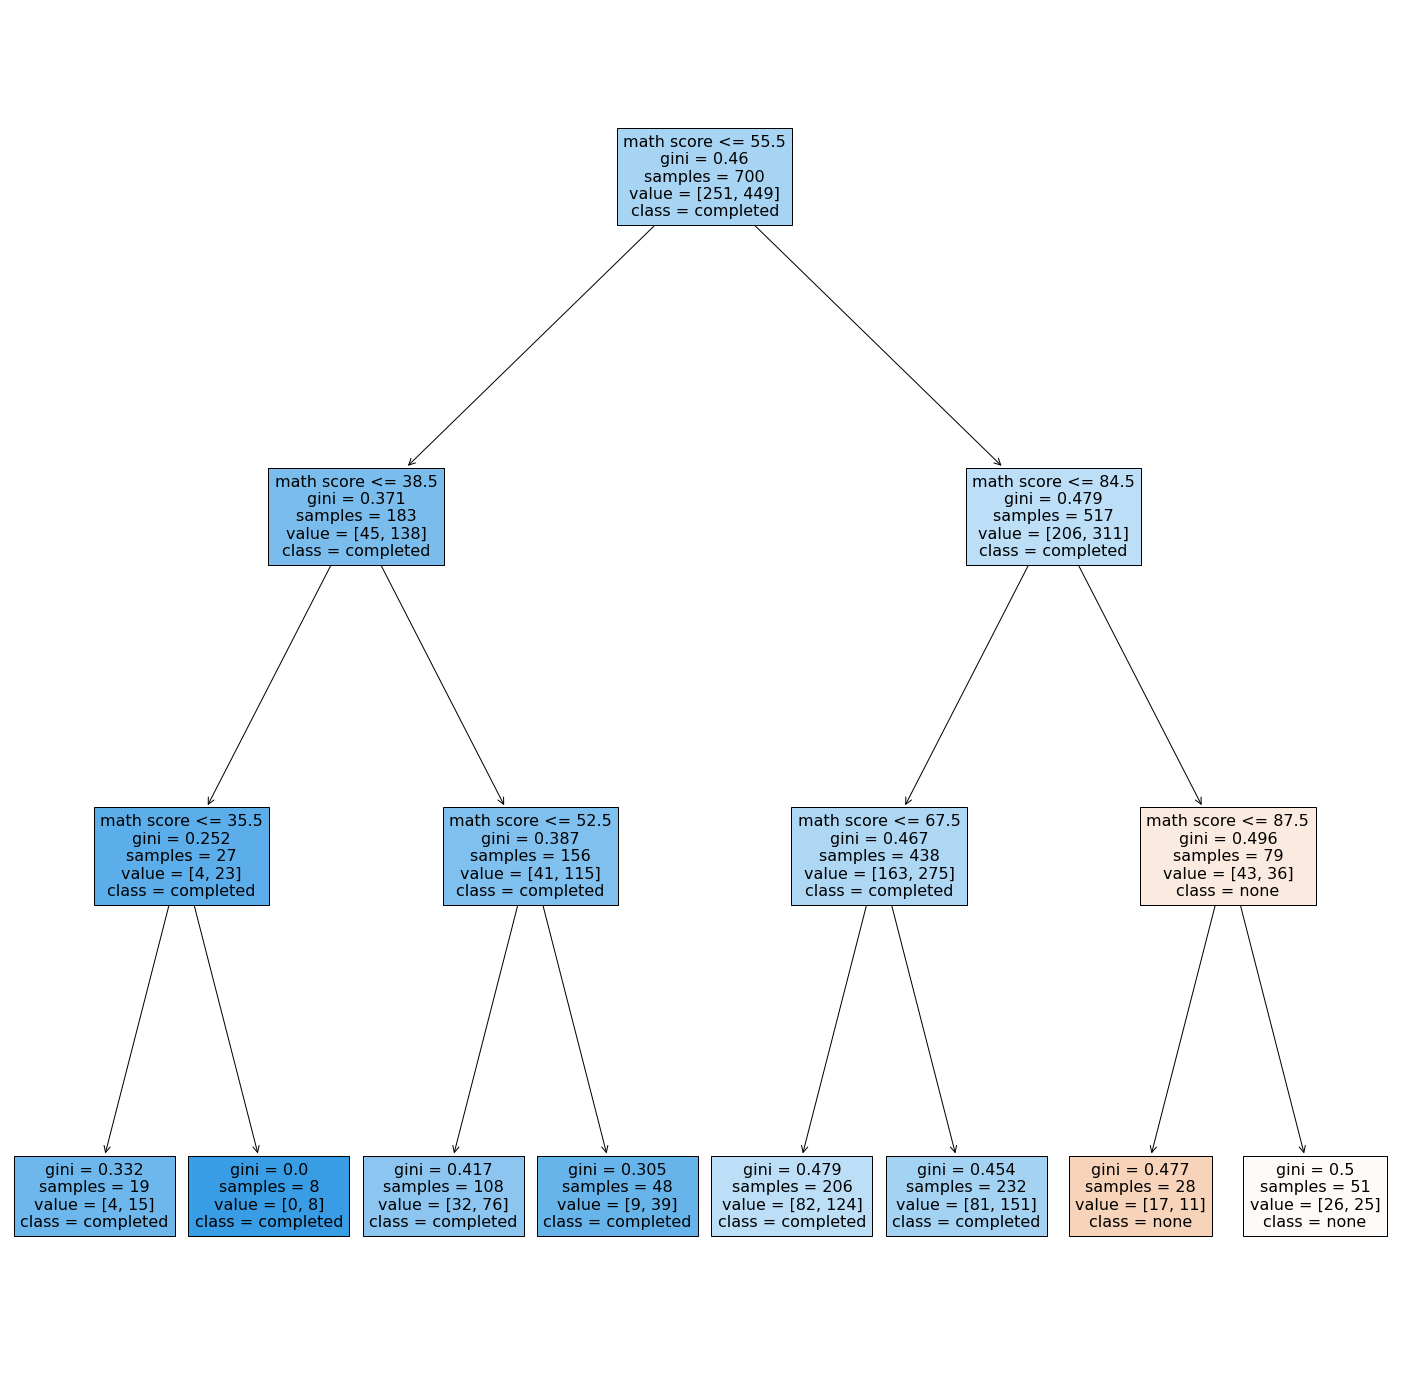

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))

plot_tree_classification(dt_classification, features, students['test preparation course'].unique())